## 1. KMeans vs GMM on a Generated Dataset

In the first example we'll look at, we'll generate a Gaussian dataset and attempt to cluster it and see if the clustering matches the original labels of the generated dataset.

We can use sklearn's [make_blobs](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function to create a dataset of Gaussian blobs:

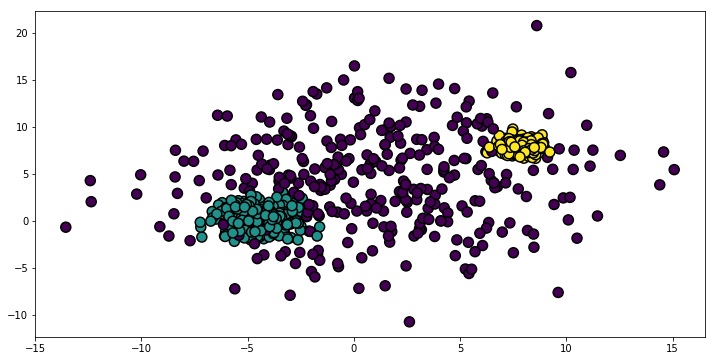

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture

n_samples = 1000

varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[5, 1, 0.5],
                             random_state=3)
X, y = varied[0], varied[1]

plt.figure( figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()
#print(varied)

Now when we hand off this dataset to the clustering algorithms, we obviously will not pass in the labels. So let's start with KMeans and see how it does with the dataset. WIll it be to produce clusters that match the original labels?

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
pred = kmeans.fit_predict(X)


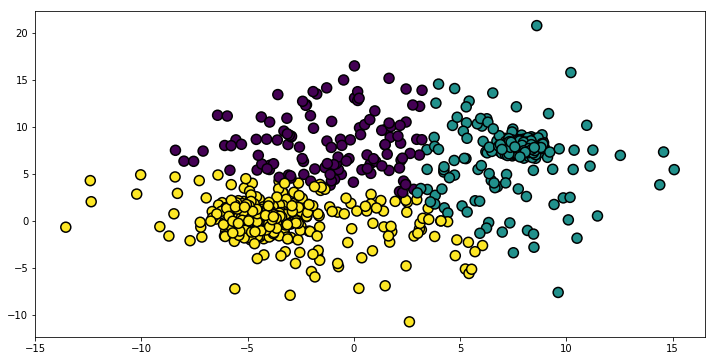

In [19]:
plt.figure( figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=pred, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

In [25]:
from sklearn.metrics import silhouette_score,adjusted_rand_score

si_kmeans=silhouette_score(X,pred)
adj_kmeans=adjusted_rand_score(y,pred)
print(si_kmeans)
print(adj_kmeans)   #not that great

0.615849959087
0.536173947918


How good of a job did KMeans do? Was it able to find clusters that match or are similar to the original labels?

Let us now try clustering with [GaussianMixture](http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html):

In [35]:
# TODO: Import GaussianMixture
from sklearn.mixture import GaussianMixture

# TODO: Create an instance of Gaussian Mixture with 3 components
gmm = GaussianMixture(n_components=3,verbose=5.0,verbose_interval=1)

# TODO: fit the dataset
gmm = gmm.fit(X)

# TODO: predict the clustering labels for the dataset
pred_gmm = gmm.predict(X)

Initialization 0
  Iteration 0	 time lapse 0.00855s	 ll change inf
  Iteration 1	 time lapse 0.00136s	 ll change 0.05446
  Iteration 2	 time lapse 0.00132s	 ll change 0.14683
  Iteration 3	 time lapse 0.00149s	 ll change 0.23649
  Iteration 4	 time lapse 0.00131s	 ll change 0.19499
  Iteration 5	 time lapse 0.00130s	 ll change 0.08174
  Iteration 6	 time lapse 0.00137s	 ll change 0.04116
  Iteration 7	 time lapse 0.00143s	 ll change 0.01786
  Iteration 8	 time lapse 0.00136s	 ll change 0.00617
  Iteration 9	 time lapse 0.00145s	 ll change 0.00184
  Iteration 10	 time lapse 0.00140s	 ll change 0.00051
Initialization converged: True	 time lapse 0.02258s	 ll -4.46078


In [42]:
print(np.shape(gmm.covariances_))
#print(gmm.converged_)
#print(gmm.precisions_)   #A precision matrix is the inverse of a covariance matrix
print(gmm.means_)

(3, 2, 2)
[[ 0.90989434  4.35797406]
 [ 7.84840153  7.88828561]
 [-4.37418307  0.29610332]]


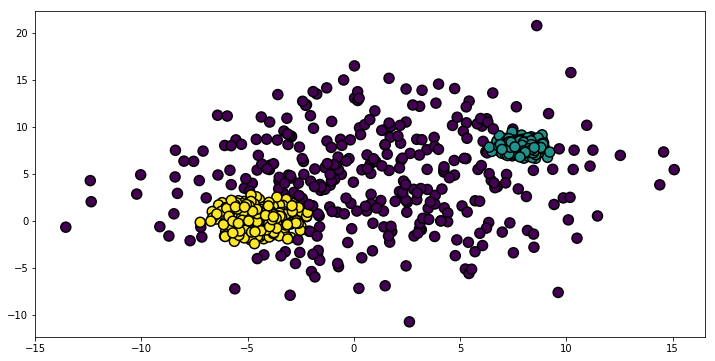

In [31]:
# Plot the clusters
plt.figure( figsize=(12,6))
plt.scatter(X[:,0], X[:,1], c=pred_gmm, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
plt.show()

In [27]:
si_gmm=silhouette_score(X,pred_gmm)
adj_gmm=adjusted_rand_score(y,pred_gmm)
print(si_gmm)
print(adj_gmm)   #adj better on GMM

0.487642116912
0.912949687507


By visually comparing the result of KMeans and GMM clustering, which one was better able to match the original?

# 2. KMeans vs GMM on The Iris Dataset

For our second example, we'll take a dataset that has more than two features. The Iris dataset is great for this purpose since it is reasonable to assume it's distributed according to Gaussian distributions.

The Iris dataset is a labeled dataset with four features:


In [43]:
import seaborn as sns

iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


How do you visualize a datset with four dimensions? 

There are a few ways (e.g. [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html), [t-SNE](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html), or [project into a lower number number dimensions using PCA](http://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_iris.html#sphx-glr-auto-examples-decomposition-plot-pca-iris-py)). Let's attempt to visualize using PairGrid because it does not distort the dataset -- it merely plots every pair of features against each other in a subplot:

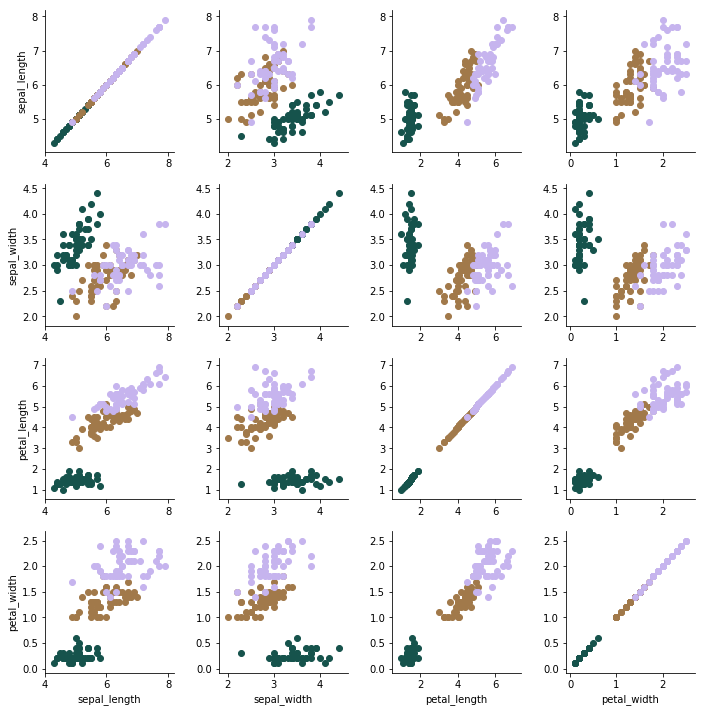

In [45]:
g = sns.PairGrid(iris, hue="species", palette=sns.color_palette("cubehelix", 3))  #, vars=['sepal_length','sepal_width','petal_length','petal_width']
g.map(plt.scatter)
plt.show()

If we cluster the Iris datset using KMeans, how close would the resulting clusters match the original labels?

In [46]:
kmeans_iris = KMeans(n_clusters=3)
pred_kmeans_iris = kmeans_iris.fit_predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

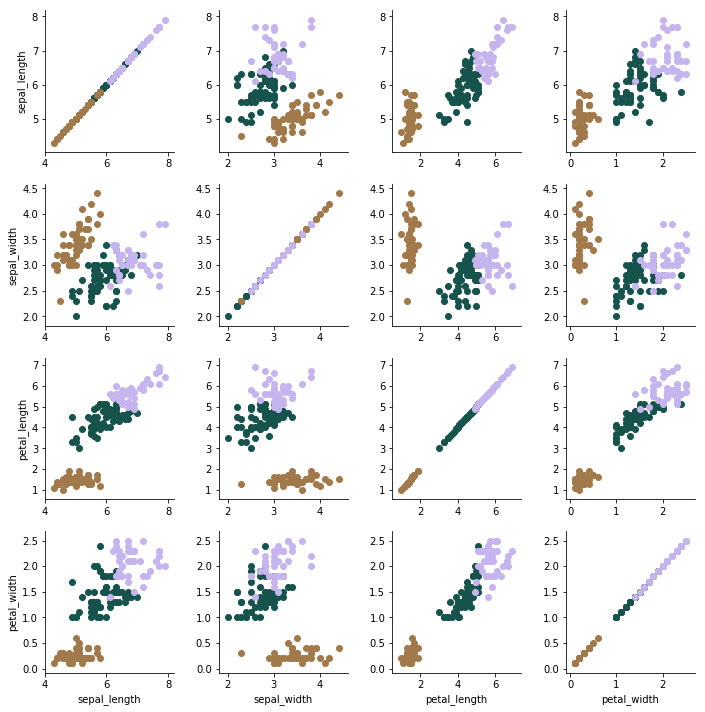

In [47]:
iris['kmeans_pred'] = pred_kmeans_iris

g = sns.PairGrid(iris, hue="kmeans_pred", palette=sns.color_palette("cubehelix", 3), vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()


How do these clusters match the original labels?

You can clearly see that visual inspection is no longer useful if we're working with multiple dimensions like this. So how can we evaluate the clustering result versus the original labels? 

You guessed it. We can use an external cluster validation index such as the [adjusted Rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html) which generates a score between -1 and 1 (where an exact match will be scored as 1).

In [48]:
# TODO: Import adjusted rand score
from sklearn.metrics import silhouette_score,adjusted_rand_score

# TODO: calculate adjusted rand score passing in the original labels and the kmeans predicted labels 
iris_kmeans_score = adjusted_rand_score(iris['species'],iris['kmeans_pred'])

# Print the score
iris_kmeans_score

0.73023827228346971

What if we cluster using Gaussian Mixture models? Would it earn a better ARI score?

In [49]:
gmm_iris = GaussianMixture(n_components=3).fit(iris[['sepal_length','sepal_width','petal_length','petal_width']])
pred_gmm_iris = gmm_iris.predict(iris[['sepal_length','sepal_width','petal_length','petal_width']])

In [50]:
iris['gmm_pred'] = pred_gmm_iris

# TODO: calculate adjusted rand score passing in the original 
# labels and the GMM predicted labels iris['species']
iris_gmm_score = adjusted_rand_score(iris['species'],iris['gmm_pred'])

# Print the score
iris_gmm_score   #awesome GMM

0.90387423177481241

Thanks to ARI socres, we have a clear indicator which clustering result better matches the original dataset.

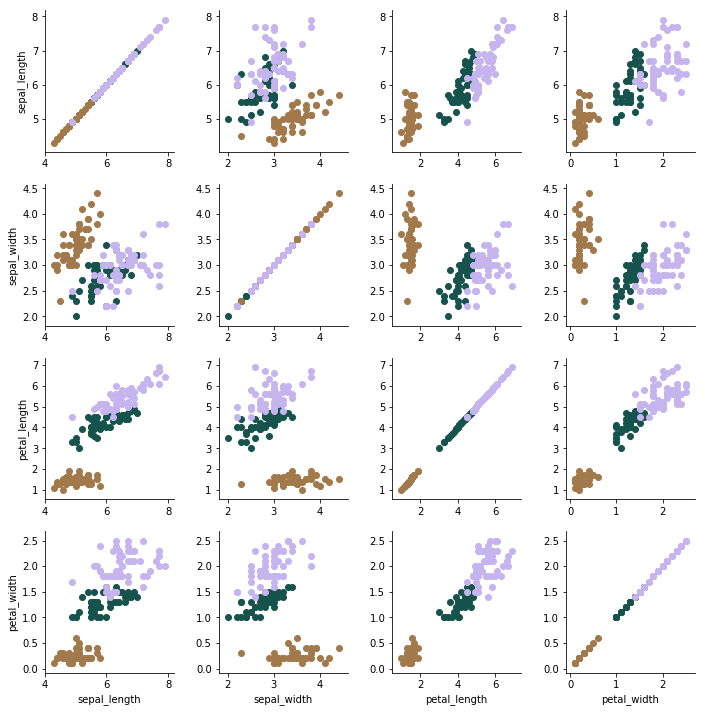

In [54]:
g = sns.PairGrid(iris, hue="gmm_pred", palette=sns.color_palette("cubehelix", 3), vars=['sepal_length','sepal_width','petal_length','petal_width'])
g.map(plt.scatter)
plt.show()


In [55]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,kmeans_pred,gmm_pred
0,5.1,3.5,1.4,0.2,setosa,1,1
1,4.9,3.0,1.4,0.2,setosa,1,1
2,4.7,3.2,1.3,0.2,setosa,1,1
3,4.6,3.1,1.5,0.2,setosa,1,1
4,5.0,3.6,1.4,0.2,setosa,1,1
